## **행렬(Matrix)**
- 벡터를 원소로 가지는 2차원 배열이다.
- 행렬은 행(row)과 열(column)이라는 인덱스(index)를 가진다.
- 행렬의 특정 행(열)을 고정하면 행(열)벡터라 부른다.
- 전치행렬은 행과 열의 인덱스가 바뀐 행렬을 말한다.

**행렬을 이해하는 방법(1)**
- 벡터가 공간에서 한 점을 의미한다면 행렬은 여러 점들을 나타낸다.
- 행렬의 행벡터 X_i는 i번째 데이터를 의미한다.
- 행렬의 X_ij는 i번째 데이터의 j 번째 변수의 값을 말한다.

In [1]:
import numpy as np

In [4]:
# numpy에서는 행(row)이 기본 단위이다.
x = np.array([[1, -2, 3],
            [7, 5, 0],
            [-2, -1, 2]])
x

array([[ 1, -2,  3],
       [ 7,  5,  0],
       [-2, -1,  2]])

**행렬의 덧셈, 뺄셈, 성분곱, 스칼라곱**
- 행렬끼리 같은 모양을 가지면 덧셈, 뺄셈, 뺄셈을 계산할 수 있다.
- 성분곱은 각 인덱스 위치끼리 곱한다.

**행렬 곱셈**
- i번째 행벡터와 j벡터 열벡터 사이의 내적을 성분으로 가지는 행렬을 계산한다.
- 행렬곱은 X의 열의 개수와 Y의 행의 개수가 같아야 한다.

In [5]:
# numpy에서는 @ 연산을 사용한다.
x = np.array([[1, -2, 3],
            [7, 5, 0],
            [-2, -1, 2]])

y = np.array([[0, 1],
             [1, -1],
             [-2, 1]])

In [6]:
x @ y

array([[-8,  6],
       [ 5,  2],
       [-5,  1]])

- 넘파이의 np.inner는 i번째 행벡터와 j번째 행벡터 사이의 내적을 성분으로 가지는 행렬을 계산한다.
- 수학에서 말하는 내적과는 다르다.
- 수학에선 보통 X와 Y의 전치행렬을 내적으로 계산한다.

In [16]:
y = np.array([[0, 1, -1],
             [1, -1, 0]])

# np.inner는 두 행렬의 열벡터의 크기가 같아야 계산이 가능하다.
np.inner(x, y)

array([[-5,  3],
       [ 5,  2],
       [-3, -1]])

**∴ 행렬의 곱은 X의 열의 개수와 Y의 행의 개수가 같아야 하고 inner에서는 X의 열의 개수와 Y의 열의 개수가 같아야 한다.**

**행렬을 이해하는 방법(2)**
- 행렬은 벡터 공간에서 사용되는 연산자(operator)로 이해한다.
- 행렬곱을 통해 벡터를 다른 차원의 공간으로 보낼 수 있다.
- 행렬곱을 통해 패턴을 추출할 수 있고 데이터를 압축할 수 있다.
- 모든 선형변환은 행렬곱으로 계산할 수 있다.
- 딥러닝은 선형변환과 비선형 함수들의 합성으로 이루어져 있다.

**역행렬 이해하기**
- 어떤 행렬 A의 연산을 거꾸로 되돌리는 행렬을 역행렬이라 부르고 A^-1라 표기한다.
- 역행렬은 행과 열 숫자가 같고 행렬식이 0이 아닌 경우에만 계산할 수 있다.
- 역행렬 연산은 행과 열의 크기가 같을 때만 가능하고 행렬 A의 행렬식이 0이 되면 안된다.
- 행렬 A와 A의 역행렬을 곱하면 항등 행렬이 나온다.

In [9]:
x = np.array([[1, -2, 3],
            [7, 5, 0],
            [-2, -1, 2]])

np.linalg.inv(x)

array([[ 0.21276596,  0.0212766 , -0.31914894],
       [-0.29787234,  0.17021277,  0.44680851],
       [ 0.06382979,  0.10638298,  0.40425532]])

In [10]:
x @ np.linalg.inv(x)

array([[ 1.00000000e+00, -1.38777878e-17,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [-2.77555756e-17,  0.00000000e+00,  1.00000000e+00]])

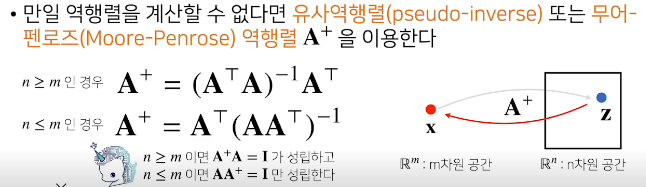

In [11]:
# n ≥ m
y = np.array([[0, 1],
             [1, -1],
             [-2, 1]])

np.linalg.pinv(y)

array([[ 5.00000000e-01,  1.11022302e-16, -5.00000000e-01],
       [ 8.33333333e-01, -3.33333333e-01, -1.66666667e-01]])

In [12]:
np.linalg.pinv(y) @ y

array([[ 1.00000000e+00, -2.22044605e-16],
       [ 1.11022302e-16,  1.00000000e+00]])

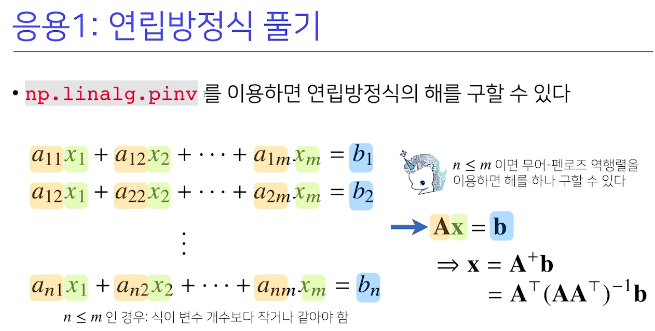

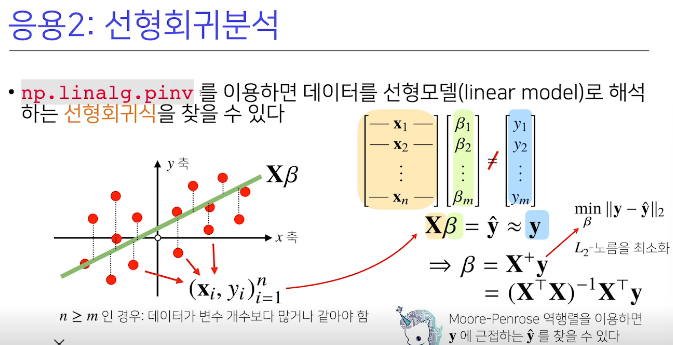

**# 선형회귀분석**
- sklearn의 LinearRegression과 같은 결과를 가져올 수 있다.
<pre>
    <code>
        from sklearn.linear_model import LinearRegression
        
        model = LinearRegression()
        model.fit(X, y)
        y_test = model.predict(X_test)
        
        # Moore-Penrose 역행렬
        # intercept 항 추가
        X_ = np.array((np.append(x, [1]) for x in X)) 
        beta = np.linalg.pinv(X_) @ y
        y_test = np.append(X_, [1]) @ beta
    </code>
</pre>